# Example

This is an end-to-end example of learning from a real-world dataset. The dataset is from a study conducted at George Mason University during the summer of 2021 on patients who were tested for COVID-19. There are 4 types of variables in this dataset.

- Demographics
- Indicators to ignore categories of symptoms
- Test result
- Symptoms

## Step 1. Load data

In [1]:
import pandas as pd

df = pd.read_csv('../../data/gmu-covid.csv')

## Step 2. Load meta information

In [2]:
import json

with open('../../data/gmu-covid.json', 'r') as f:
    meta = json.load(f)

This meta information specified the `partial` ordering of the variables as follows. Notice the sequence: demographics, indicators, test result and then symptoms.

In [3]:
print(json.dumps(meta, indent=2))

{
  "ordering": [
    [
      "RaceWhite",
      "GenderFemale",
      "Age30orMore"
    ],
    [
      "IgnoreRespSymp",
      "IgnoreGastroSymp",
      "IgnoreNeuroSymp",
      "IgnoreInflamSymp"
    ],
    [
      "TestPositive"
    ],
    [
      "Cough"
    ],
    [
      "Runnynose"
    ],
    [
      "Sorethroat"
    ],
    [
      "Headaches"
    ],
    [
      "Fatigue"
    ],
    [
      "MuscleAches"
    ],
    [
      "Chills"
    ],
    [
      "Diarrhea"
    ],
    [
      "Difficultybreathing"
    ],
    [
      "LossAppetite"
    ],
    [
      "Chestpain"
    ],
    [
      "ExcessSweat"
    ],
    [
      "Shortnessofbreath",
      "Vomiting"
    ],
    [
      "AbdominalPain"
    ],
    [
      "JointPain"
    ],
    [
      "LossTaste"
    ],
    [
      "LossSmell",
      "Confusion"
    ],
    [
      "LossBalance",
      "Pinkeye",
      "Shivering"
    ],
    [
      "Wheezing"
    ],
    [
      "RedRash",
      "UnexplainedRash"
    ],
    [
      "Numbness",


## Step 3. Learn structure and parameters

In [4]:
from lassobbn.learn import do_learn

json_data = do_learn(df, meta, threshold=0.5)

## Step 4. Create BBN

The underlying inference engine is [py-bbn](https://py-bbn.readthedocs.io).

In [5]:
from lassobbn.learn import to_bbn

bbn = to_bbn(json_data)

Visualize BBN structure using [networkx](https://networkx.org/) and [dot](https://www.mankier.com/1/dot).

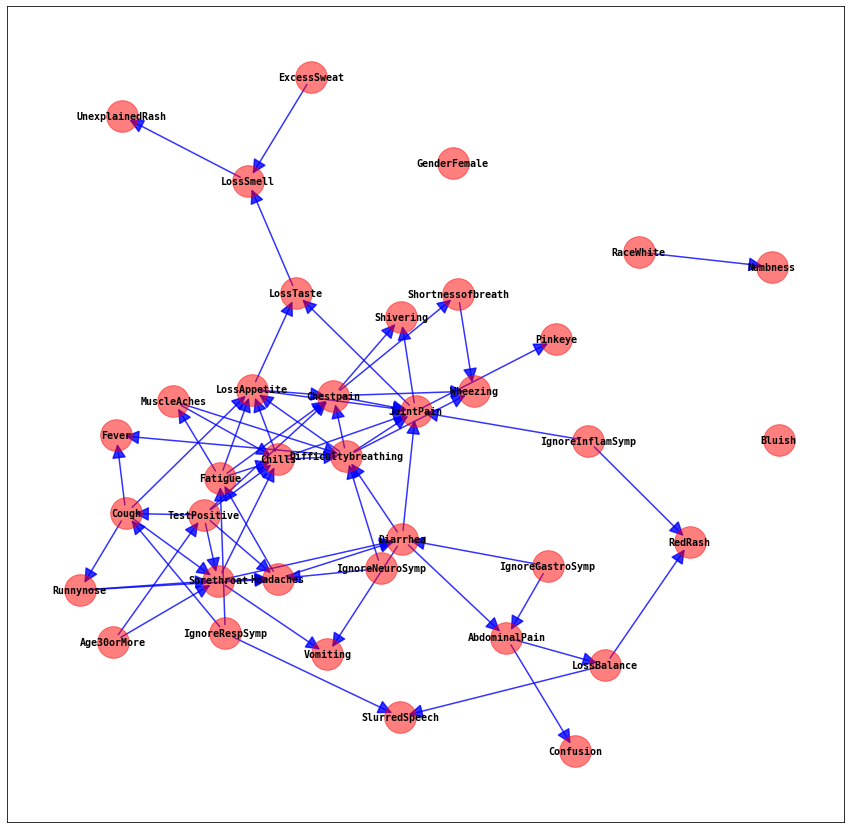

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))

g, labels = bbn.to_nx_graph()
    
pos = nx.nx_agraph.graphviz_layout(g, prog='dot', args='-Kneato')

params = {
    'node_color': 'r',
    'node_size': 1000,
    'node_shape': 'o',
    'alpha': 0.5,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_nodes(g, **params)

params = {
    'labels': labels,
    'font_size': 10,
    'font_color': 'k',
    'font_family': 'monospace',
    'font_weight': 'bold',
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_labels(g, **params)

params = {
    'width': 1.5,
    'alpha': 0.8,
    'edge_color': 'b',
    'arrowsize': 30,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_edges(g, **params)

## Step 5. Do inference

You can create a join tree from a BBN and query for the marginals.

In [7]:
from pybbn.pptc.inferencecontroller import InferenceController

join_tree = InferenceController.apply(bbn)


mdf = pd.DataFrame([{**{'name': node}, **{val: prob for val, prob in posteriors.items()}} 
                    for node, posteriors in join_tree.get_posteriors().items()])
mdf.index = mdf['name']
mdf = mdf.drop(columns=['name'])
mdf

,0,1
name,,
GenderFemale,0.420824,0.579176
Bluish,0.991323,0.008677
Numbness,0.926247,0.073753
RaceWhite,0.210412,0.789588
AbdominalPain,0.678357,0.321643
Confusion,0.881061,0.118939
JointPain,0.710871,0.289129
Pinkeye,0.903404,0.096596
LossSmell,0.842829,0.157171
